<a href="https://colab.research.google.com/github/jwphantom/TP-Real-Estate-Valuation/blob/main/TP_Real_Estate_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importation de panda pour la manipulation des données
import pandas as pd

#importation de numpy et matplotlib pour une facile manipulation des données
import numpy as np
import matplotlib.pyplot as plt

# importation de seaborn pour la graphique
import seaborn as sns

#environnement google colab
from google.colab import files
file = files.upload()

#importation io pour l'importation des fichier
import io

# téléchargement de la base de données excel

data = pd.read_excel(io.BytesIO(file['RealEstateValuation.xlsx']),index_col = 0)



Saving RealEstateValuation.xlsx to RealEstateValuation.xlsx


In [ ]:
# Aperçu de notre jeu de donnée
print(data)

              X1    X2          X3  X4       X5          X6     Y  \
No                                                                  
1    2012.916667  32.0    84.87882  10  24.98298  121.54024  37.9   
2    2012.916667  19.5   306.59470   9  24.98034  121.53951  42.2   
3    2013.583333  13.3   561.98450   5  24.98746  121.54391  47.3   
4    2013.500000  13.3   561.98450   5  24.98746  121.54391  54.8   
5    2012.833333   5.0   390.56840   5  24.97937  121.54245  43.1   
..           ...   ...         ...  ..       ...        ...   ...   
410  2013.000000  13.7  4082.01500   0  24.94155  121.50381  15.4   
411  2012.666667   5.6    90.45606   9  24.97433  121.54310  50.0   
412  2013.250000  18.8   390.96960   7  24.97923  121.53986  40.6   
413  2013.000000   8.1   104.81010   5  24.96674  121.54067  52.5   
414  2013.500000   6.5    90.45606   9  24.97433  121.54310  63.9   

                       X7  
No                         
1    (24,98298;121,54024)  
2    (24,98034;121

In [ ]:
# informations sur les métas données du jeu de donnée
informations = data.info()
print(informations)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
 7   X7      414 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 29.1+ KB
None


In [ ]:
# Résumé de certaines données statistiques telles que le centile, la moyenne et la norme des valeurs numériques de la série
resume = data.describe()
print(resume)

                X1          X2           X3          X4         X5   \
count   414.000000  414.000000   414.000000  414.000000  414.000000   
mean   2013.148953   17.712560  1083.885689    4.094203   24.969030   
std       0.281995   11.392485  1262.109595    2.945562    0.012410   
min    2012.666667    0.000000    23.382840    0.000000   24.932070   
25%    2012.916667    9.025000   289.324800    1.000000   24.963000   
50%    2013.166667   16.100000   492.231300    4.000000   24.971100   
75%    2013.416667   28.150000  1454.279000    6.000000   24.977455   
max    2013.583333   43.800000  6488.021000   10.000000   25.014590   

               X6           Y  
count  414.000000  414.000000  
mean   121.533361   37.980193  
std      0.015347   13.606488  
min    121.473530    7.600000  
25%    121.528085   27.700000  
50%    121.538630   38.450000  
75%    121.543305   46.600000  
max    121.566270  117.500000  


In [ ]:
# Statistiques groupées
   
# prix de l'unité de surface par l'age de la maison

priceUnitByAge = data.groupby('X2')['Y'].agg([np.mean, np.median, np.min, np.max])
print(priceUnitByAge)

           mean  amin  amax
X2                         
0.0   54.135294  37.9  73.6
1.0   50.700000  50.7  50.7
1.1   49.780000  45.1  54.4
1.5   48.700000  47.7  49.7
1.7   50.400000  50.4  50.4
...         ...   ...   ...
40.9  54.350000  41.0  67.7
41.3  47.900000  35.1  60.7
41.4  63.300000  63.3  63.3
42.7  35.300000  35.3  35.3
43.8  42.700000  42.7  42.7

[236 rows x 3 columns]


In [ ]:
# Statistiques groupées
   
# prix de l'unité de surface par nombre de magasin à proximité à pieds

priceUnitByCountShop = data.groupby('X4')['Y'].agg([np.mean, np.median, np.min, np.max])
print(priceUnitByAge)

         mean  amin   amax
X4                        
0   26.462687  11.6   55.3
1   31.839130  11.2  117.5
2   31.412500  20.9   50.5
3   29.536957  17.7   61.5
4   37.474194  21.8   62.9
5   44.729851  22.8   60.7
6   46.951351   7.6   73.6
7   43.848387  25.0   62.1
8   44.696667  26.5   67.7
9   51.732000  32.4   78.3
10  48.430000  37.9   61.9


In [ ]:
# Statistiques groupées
   
# prix de l'unité de surface par rapport à a distance à la station de metro

priceUnitByDistanceMRT = data.groupby('X3')['Y'].agg([np.mean,np.median, np.min, np.max])
print(priceUnitByAge)

                 mean  amin  amax
X3                               
23.38284    48.700000  47.7  49.7
49.66105    57.300000  56.8  57.8
56.47425    56.666667  53.5  62.1
57.58945    42.700000  42.7  42.7
82.88643    46.600000  46.6  46.6
...               ...   ...   ...
4605.74900  13.400000  13.4  13.4
5512.03800  18.100000  17.4  18.8
6306.15300  15.000000  15.0  15.0
6396.28300  12.200000  12.2  12.2
6488.02100  11.200000  11.2  11.2

[259 rows x 3 columns]


In [ ]:
# prix de l'unité de surface par rapport à la zone géographique (Lat,Lon)

priceByLocation = data.groupby('X7')['Y'].agg([np.mean,np.median, np.min, np.max])
print(priceByLocation)

                           mean  median  amin  amax
X7                                                 
(24,93207;121,51597)  29.300000   29.30  29.3  29.3
(24,93293;121,51203)  45.100000   45.10  45.1  45.1
(24,93363;121,51158)  29.300000   29.30  29.3  29.3
(24,93885;121,50383)  16.933333   18.60  13.0  19.2
(24,94155;121,50381)  16.457143   15.90  12.8  20.0
...                         ...     ...   ...   ...
(24,99156;121,53406)  33.250000   33.25  32.2  34.3
(24,99176;121,53456)  35.400000   35.40  34.1  36.7
(24,998;121,5155)     41.200000   41.20  41.2  41.2
(25,00115;121,51776)  46.600000   46.60  46.6  46.6
(25,01459;121,51816)  27.300000   27.30  27.3  27.3

[259 rows x 4 columns]


In [ ]:
#les dates de transactions des maisons selons leur ages
dateTransactionsByAgeofHouse = data.groupby('X1')['X2'].agg([np.mean, np.median, np.min, np.max])
print(dateTransactionsByAgeofHouse)

                  mean  median  amin  amax
X1                                        
2012.666667  18.623333   17.90   0.0  37.1
2012.750000  15.525926   14.10   0.0  38.0
2012.833333  13.203226   12.70   0.0  34.9
2012.916667  19.421053   17.25   2.0  40.9
2013.000000  17.814286   16.70   1.0  39.6
2013.083333  20.873913   16.70   0.0  42.7
2013.166667  18.960000   16.20   1.1  43.8
2013.250000  17.437500   16.35   0.0  40.9
2013.333333  16.555172   14.80   0.0  39.7
2013.416667  16.810345   16.40   0.0  40.1
2013.500000  16.465957   13.90   4.0  38.3
2013.583333  21.208696   18.10   2.6  35.9


In [ ]:
# Quantiles 

# 1- Quartile d'ordre 1 de l'age des maison
Q1 = np.quantile(data['X2'], 0.25)
print(Q1)


9.025


In [ ]:
# Quantiles 

# 2- Tous les quartiles du prix de l'unité de surface 

QY = np.quantile(data['X2'], [0, .25, .5, .75, 1])
print(QY)

[ 0.     9.025 16.1   28.15  43.8  ]


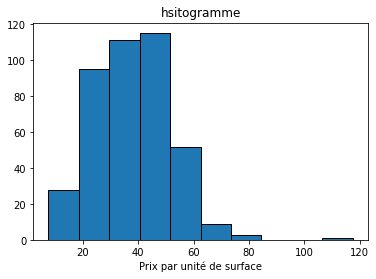

In [ ]:
#Distribution de la variable d'interet(Prix par unité de surface)
# histogramme

plt.hist(data['Y'], edgecolor='black')
plt.xlabel("Prix par unité de surface")
plt.title('hsitogramme')
plt.show()

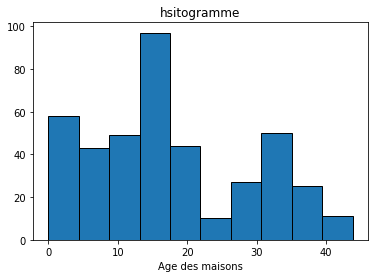

In [ ]:
#Distribution de la variable des ages des maisons
# histogramme

plt.hist(data['X2'], edgecolor='black')
plt.xlabel("Age des maisons")
plt.title('hsitogramme')
plt.show()

In [ ]:
# Distribution de la variable du nombre de magasin à proximité des magasins
# Statistique
resumeMagz = data['X4'].describe()
print(resumeMagz)


count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: X4, dtype: float64


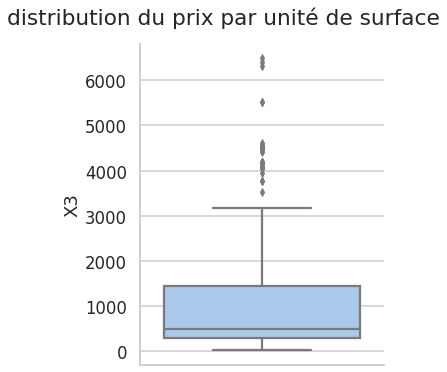

In [ ]:
#Distributions de la distance de metro le plus proche

sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("pastel")


g1 = sns.catplot(y='X3', data = data, kind = 'box')
g1.fig.suptitle('Station de metro la plis proche', y =1.05)
plt.show()

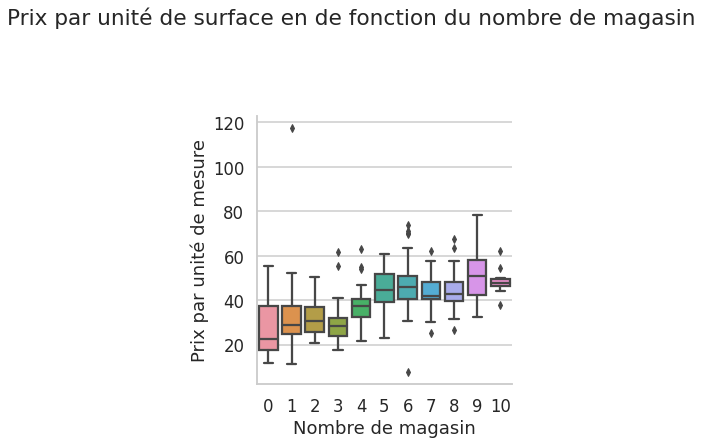

In [ ]:
#distributions du prix par unité de surface par le nombre de magasin
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("pastel")


g2 = sns.catplot(x ="X4", y = "Y", data = data, kind = "box" )
g2.fig.suptitle("Prix par unité de surface en de fonction du nombre de magasin", y =1.25)
g2.set(xlabel = "Nombre de magasin", ylabel = "Prix par unité de mesure")
plt.show()

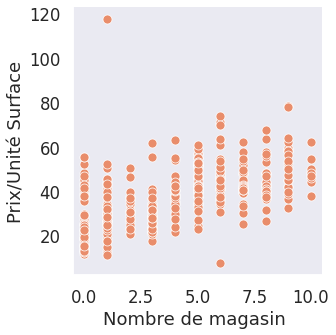

In [ ]:
# Lien entre variables


sns.set_style('dark')
sns.set_context("talk")
sns.set_palette("flare")

#  nuage de points: Prix/Unité Surface et nombre de magasins

g3 = sns.relplot(x = "X4", y = "Y", data = data , kind = "scatter")
g3.set(xlabel ="Nombre de magasin " ,ylabel = "Prix/Unité Surface")
plt.show()
     

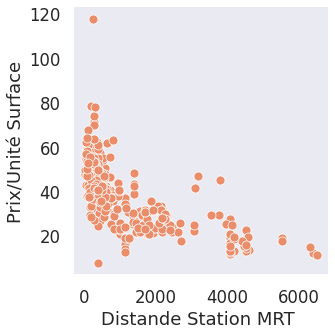

In [ ]:
# Lien entre variables


sns.set_style('dark')
sns.set_context("talk")
sns.set_palette("flare")

#  nuage de points: Prix/Unité Surface et station de métro la plus métro

g4 = sns.relplot(x = "X3", y = "Y", data = data , kind = "scatter")
g4.set(xlabel ="Distande Station MRT " ,ylabel = "Prix/Unité Surface")
plt.show()
     

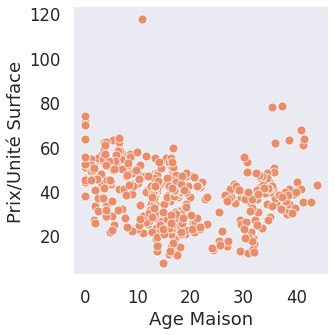

In [ ]:
# Lien entre variables


sns.set_style('dark')
sns.set_context("talk")
sns.set_palette("flare")

#  nuage de points: Prix/Unité Surface et age maison

g5 = sns.relplot(x = "X2", y = "Y", data = data , kind = "scatter")
g5.set(xlabel ="Age Maison" ,ylabel = "Prix/Unité Surface")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


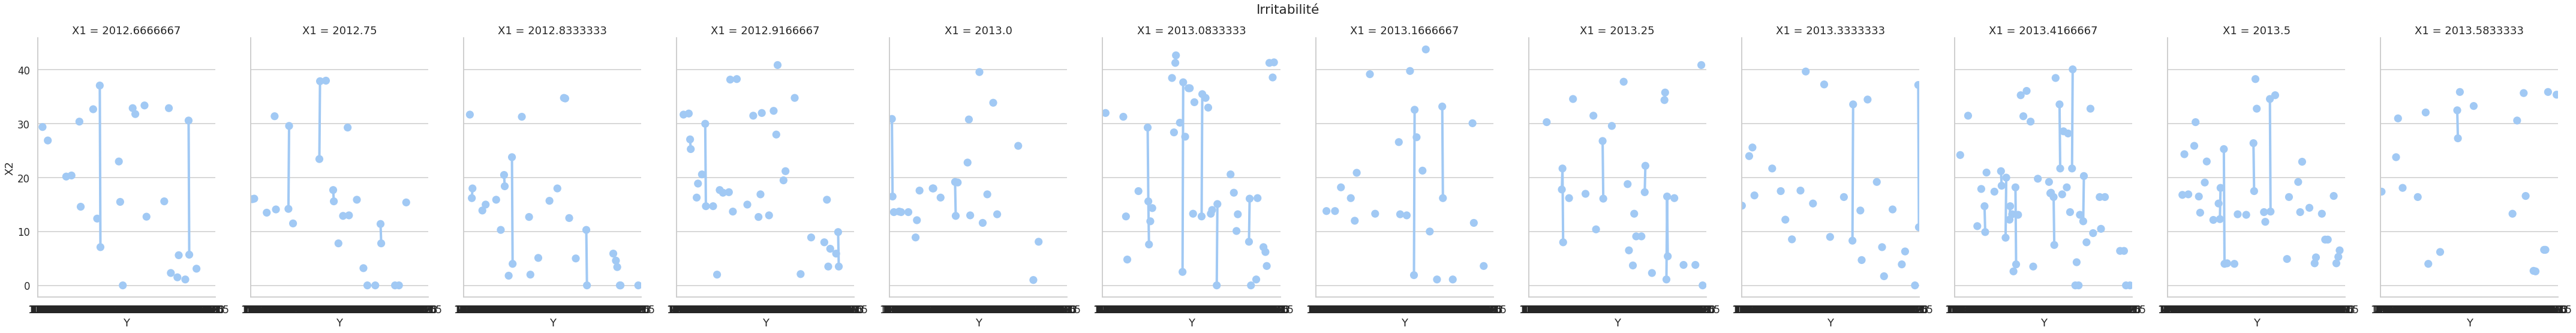

In [ ]:
# poids moyen a la naissance des enfants nés de mère irrités

ax = sns.catplot('Y', 'X2', data = data, kind = 'point', col = 'X1', ci = None)
ax.fig.set_figheight(8.7)
ax.fig.suptitle("Irritabilité")
plt.show()

In [ ]:
from scipy.stats import shapiro

p1 = shapiro(data['Y'])

print("pValue de X4 : "+ str(p1))


pValue de X4 : ShapiroResult(statistic=0.972750186920166, pvalue=5.412278483163391e-07)


In [ ]:
#Comparaison deux échantillons(age de la maison et prix de l'unité de surface) pour voir s'ils sont significativement différents


import scipy.stats as stats

copyY = np.copy(data['X2'])
copyX4 = np.copy(data['X3'])

# y = stats.ttest_ind(copyY,copyX4) 

# print("pValue est de  : "+ str(y[1]))

result = stats.kstest(copyY, copyX4)

print(result)





KstestResult(statistic=0.9951690821256038, pvalue=1.3800844769330233e-242)


In [ ]:
from scipy.stats import anderson

x = np.copy(data['X2'])

anderson(x, dist='norm')

AndersonResult(statistic=7.327941717351109, critical_values=array([0.571, 0.65 , 0.78 , 0.909, 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))